In [22]:
from convert_text import *

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [7]:
phrases = text_to_phrases('../tmp.txt', language_code='fr-fr')

In [8]:
if not os.path.isfile('../tmp_phon_phrases.pkl'):
    phon_phrases = phonemize_phrases(phrases, language_code='fr-fr', njobs=40)
    with open('../tmp_phon_phrases.pkl', 'wb') as outfile:
        pickle.dump(phon_phrases, outfile) 
else:
    with open('../tmp_phon_phrases.pkl', 'rb') as f:
        phon_phrases = pickle.load(f) 
    

In [9]:
if not os.path.isfile('../tmp_phon_phrases_langflag.pkl'):
    phon_phrases_langflag = phonemize_phrases(phrases, language_code='fr-fr', njobs=80, language_switch="keep-flags")
    with open('../tmp_phon_phrases_langflag.pkl', 'wb') as outfile:
        pickle.dump(phon_phrases_langflag, outfile) 
else:
    with open('../tmp_phon_phrases_langflag.pkl', 'rb') as f:
        phon_phrases_langflag = pickle.load(f) 

In [10]:
counts = nltk.FreqDist()
for sent in phon_phrases:
    counts.update(nltk.tokenize.word_tokenize(sent))
counts.pop('/w')

70686

58 phones found


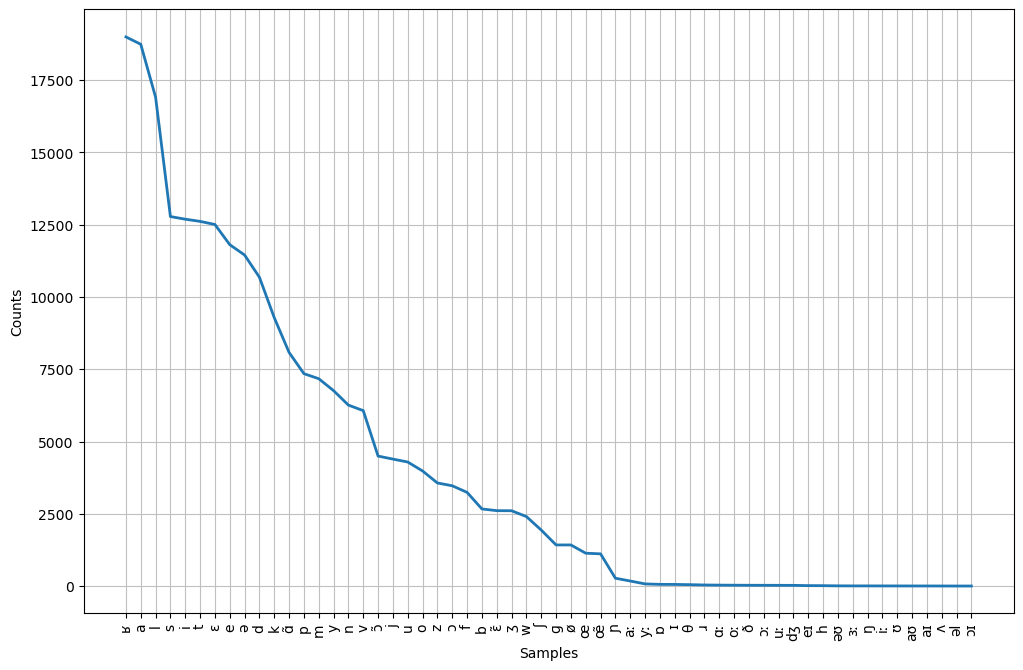

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
print("{} phones found".format(len(counts)))
counts.plot(len(counts),cumulative=False)

In [12]:
n_sent_nf = 0
counts_nolang = nltk.FreqDist()
for sent in phon_phrases_langflag:
    if not '(en)' in sent:
        n_sent_nf+=1
        counts_nolang.update(nltk.tokenize.word_tokenize(sent))
counts_nolang.pop('/w')

69418

In [13]:
perc_foreignsent = 100-(n_sent_nf*100/len(phon_phrases))
print("{}% of the phrases were removed because containing language_switch flags".format(round(perc_foreignsent,2)))

1.5% of the phrases were removed because containing language_switch flags


37 phones found after removing the switch language flags


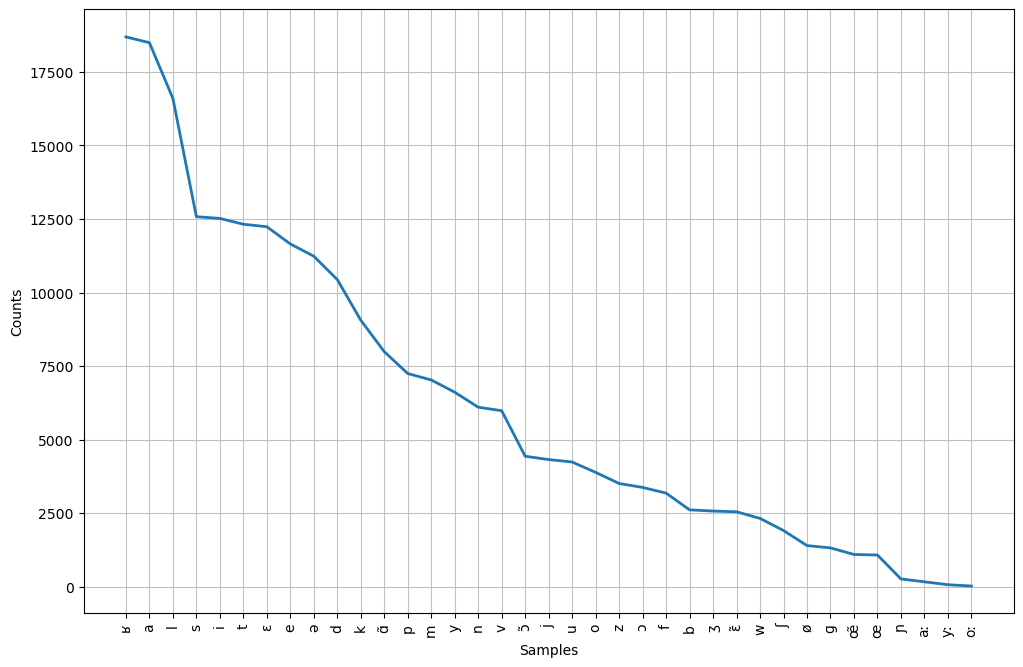

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
print("{} phones found after removing the switch language flags".format(len(counts_nolang)))
counts_nolang.plot(len(counts),cumulative=False)

In [15]:
phon_dict = phoneme_statistics(phon_phrases)
w_df, nw_df = get_valid_ngrams(phon_dict) 
hf, lf = match_w_nw(w_df, nw_df)
hf5, lf5 = match_w_nw(w_df, nw_df, n_perc=5)

42 potential syllable structures
42 potential syllable structures


In [52]:
nw_df_nobound = nw_df[nw_df['form_bound'].str.count('/w')==1]
nw_df_onebound = nw_df[nw_df['form_bound'].str.count('/w')==2]
nw_df_twobound = nw_df[nw_df['form_bound'].str.count('/w')==3]

Text(0, 0.5, 'Number of different ngrams')

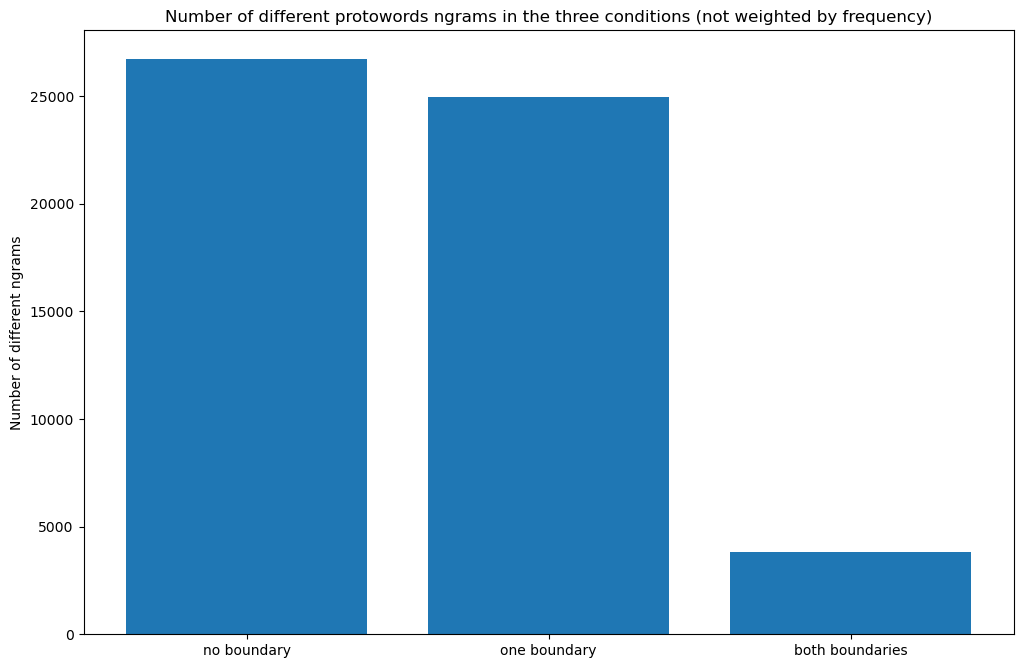

In [87]:
#the one below is the number of different ngrams, not frequency weighted
plt.bar(['no boundary','one boundary','both boundaries'],[len(nw_df_nobound), len(nw_df_onebound), len(nw_df_twobound)])
plt.title("Number of different protowords ngrams in the three conditions (not weighted by frequency)")
plt.ylabel("Number of different ngrams")

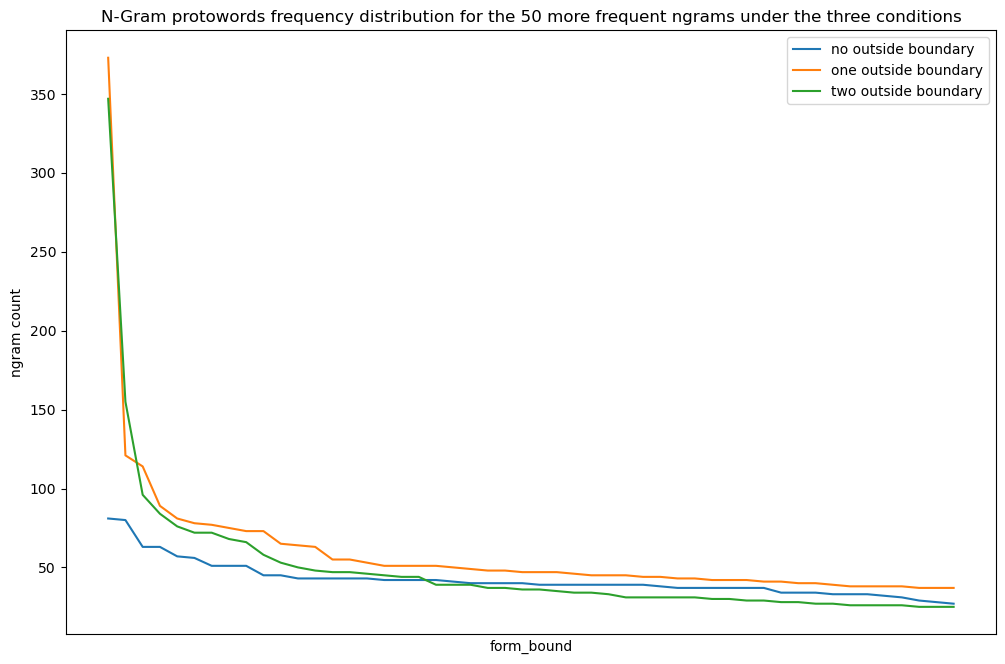

In [73]:
thresh=50
ax = nw_df_nobound.sort_values(by=['count'], ascending=False).head(thresh).plot(x="form_bound", y="count")
nw_df_onebound.sort_values(by=['count'], ascending=False).head(thresh).plot(x="form_bound", y="count", ax=ax)
nw_df_twobound.sort_values(by=['count'], ascending=False).head(thresh).plot(x="form_bound", y="count", ax=ax)
#plt.axis('off')
ax.legend(["no outside boundary", "one outside boundary", "two outside boundary"]);
ax.set_title('N-Gram protowords frequency distribution for the {} more frequent ngrams under the three conditions'.format(thresh))
ax.set_ylabel('ngram count')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

In [78]:
nw_df_twobound.sort_values(by=['count'], ascending=False).head(10)

,form,form_bound,syll,structure,count
10933,d ə l a,/w d ə /w l a /w,d ə | l a,C V | C V,347
953,a l a,/w a /w l a /w,a | l a,V | C V,155
12098,k ə l ə,/w k ə /w l ə /w,k ə | l ə,C V | C V,96
11312,d ə s ə,/w d ə /w s ə /w,d ə | s ə,C V | C V,84
11357,d ə s a,/w d ə /w s a /w,d ə | s a,C V | C V,76
11334,d ə s e,/w d ə /w s e /w,d ə | s e,C V | C V,72
1105,e d ə,/w e /w d ə /w,e | d ə,V | C V,72
32194,s y ʁ l a,/w s y ʁ /w l a /w,s y ʁ | l a,C V C | C V,68
32325,s y ʁ l ə,/w s y ʁ /w l ə /w,s y ʁ | l ə,C V C | C V,66
11113,k ə l a,/w k ə /w l a /w,k ə | l a,C V | C V,58


In [30]:
hf5['C V | C V']['nw']

,form,form_bound,syll,structure,count
10933,d ə l a,/w d ə /w l a /w,d ə | l a,C V | C V,347
10949,d ə k o,/w d ə /w k o,d ə | k o,C V | C V,20
10964,l a d a,/w l a /w d a,l a | d a,C V | C V,20
10968,j e d ə,j e /w d ə /w,j e | d ə,C V | C V,20
10990,d ə s ɛ,/w d ə /w s ɛ,d ə | s ɛ,C V | C V,46
...,...,...,...,...,...
18758,k ə l y,/w k ə /w l y,k ə | l y,C V | C V,14
19695,s a f a,/w s a /w f a,s a | f a,C V | C V,17
19790,v ɛ d i,v ɛ /w d i /w,v ɛ | d i,C V | C V,14
20925,d y k o,/w d y /w k o,d y | k o,C V | C V,38


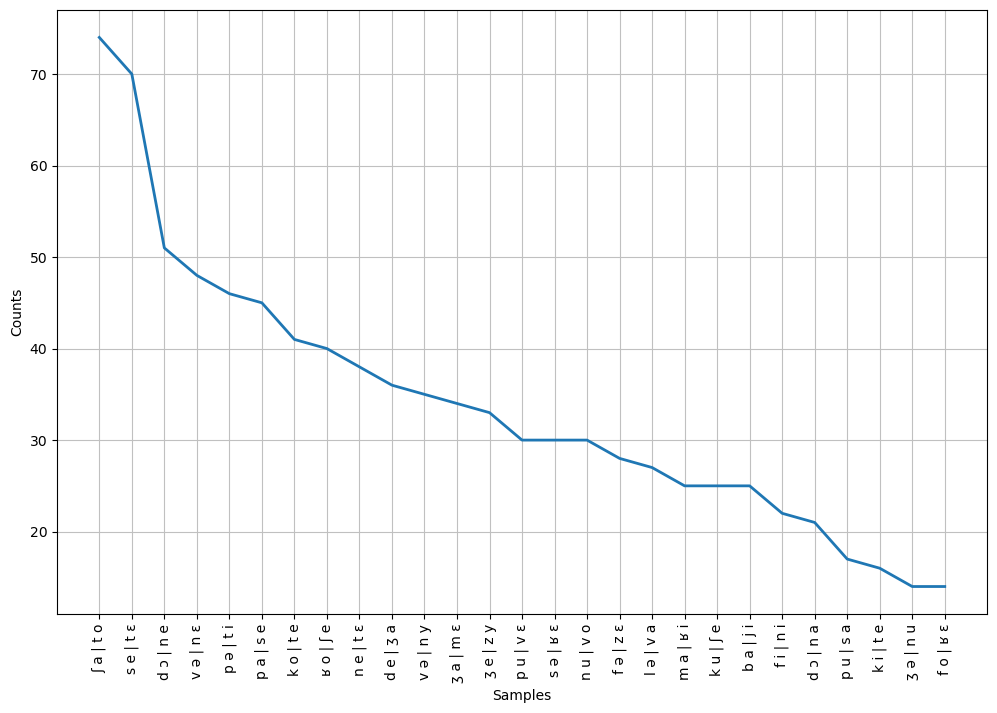

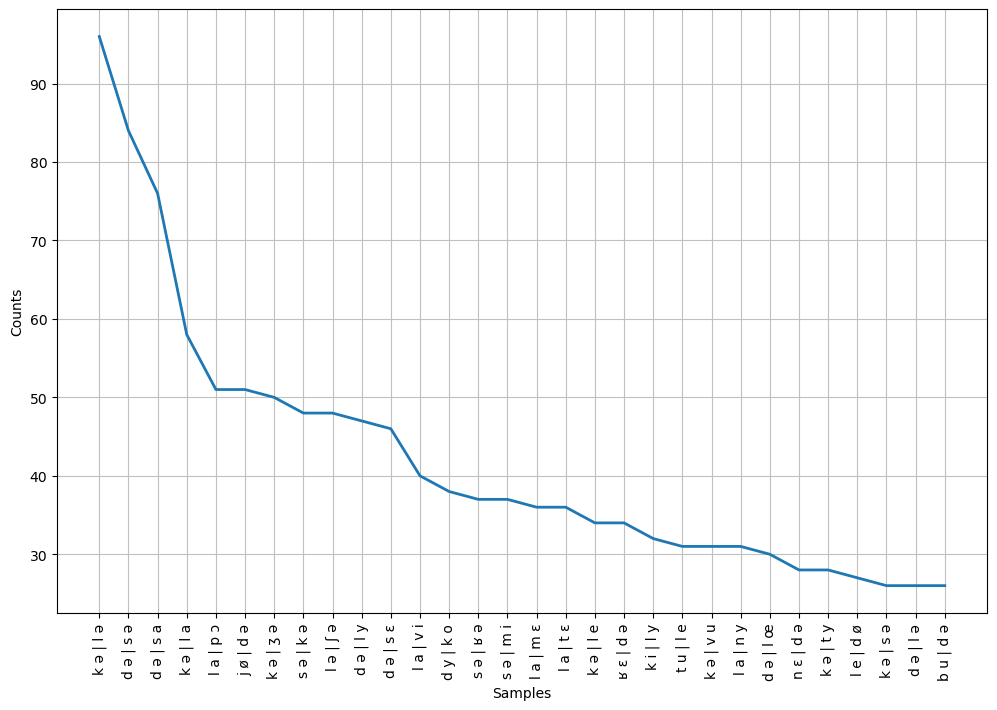

In [31]:
df = hf5['C V | C V']['w']
for df in [hf5['C V | C V']['w'], hf5['C V | C V']['nw']]:
    fd = nltk.FreqDist(df.set_index('syll')['count'].to_dict())
    fd.plot(30,cumulative=False)


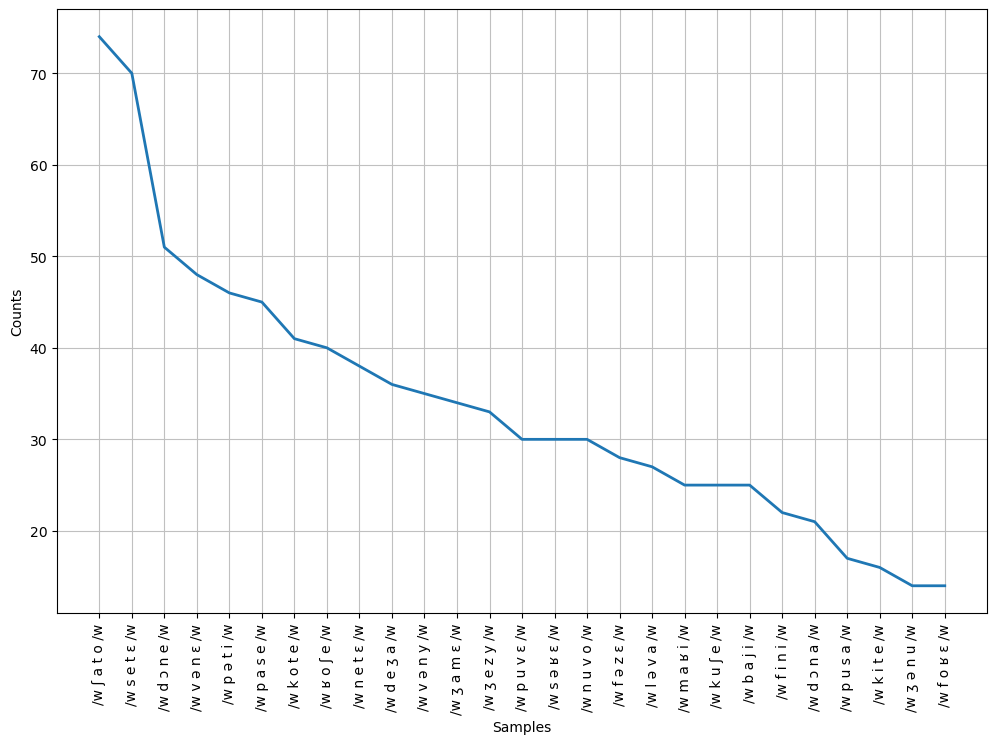

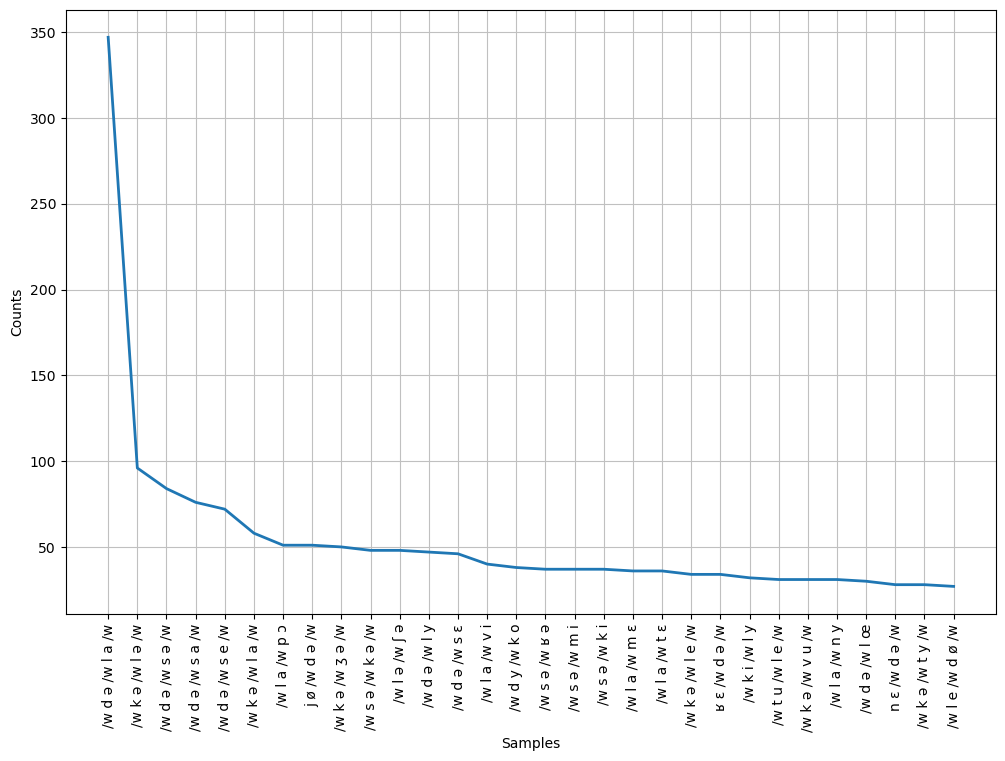

In [33]:
df = hf5['C V | C V']['w']
for df in [hf5['C V | C V']['w'], hf5['C V | C V']['nw']]:
    fd = nltk.FreqDist(df.set_index('form_bound')['count'].to_dict())
    fd.plot(30,cumulative=False)

In [17]:
df_syll = df.set_index('syll')['count'].to_dict()

In [18]:
def plot_ngram(dict, structure, n=15, p_type="bar"):
    #type = bar or plot
    
    fig, axs = plt.subplots(1, 2, figsize=(25,10), sharey=True)
    
    dict_df = dict[structure]

    for i,y in zip(dict_df.items(), range(len(dict_df.keys()))): #should be "w" and "nw":
        k=i[0]
        if k == "w":
            k="words"
        elif k == "nw":
            k="proto-words"
        df=i[1]
        df_cat = df.sort_values(by=['count'], ascending=False).head(n)
        names=df_cat['syll']
        values=df_cat['count']
        if p_type == "bar":
            axs[y].bar(names, values)
        elif p_type == "plot":
            axs[y].plot(names, values)
        else:
            raise ValueError()
        axs[y].set_xticklabels(names, rotation=45)
        axs[y].title.set_text(k)

    fig.suptitle('{} more frequent ngrams with the "{}" structure'.format(n, structure))

<ipython-input-18-ef380a278145>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[y].set_xticklabels(names, rotation=45)


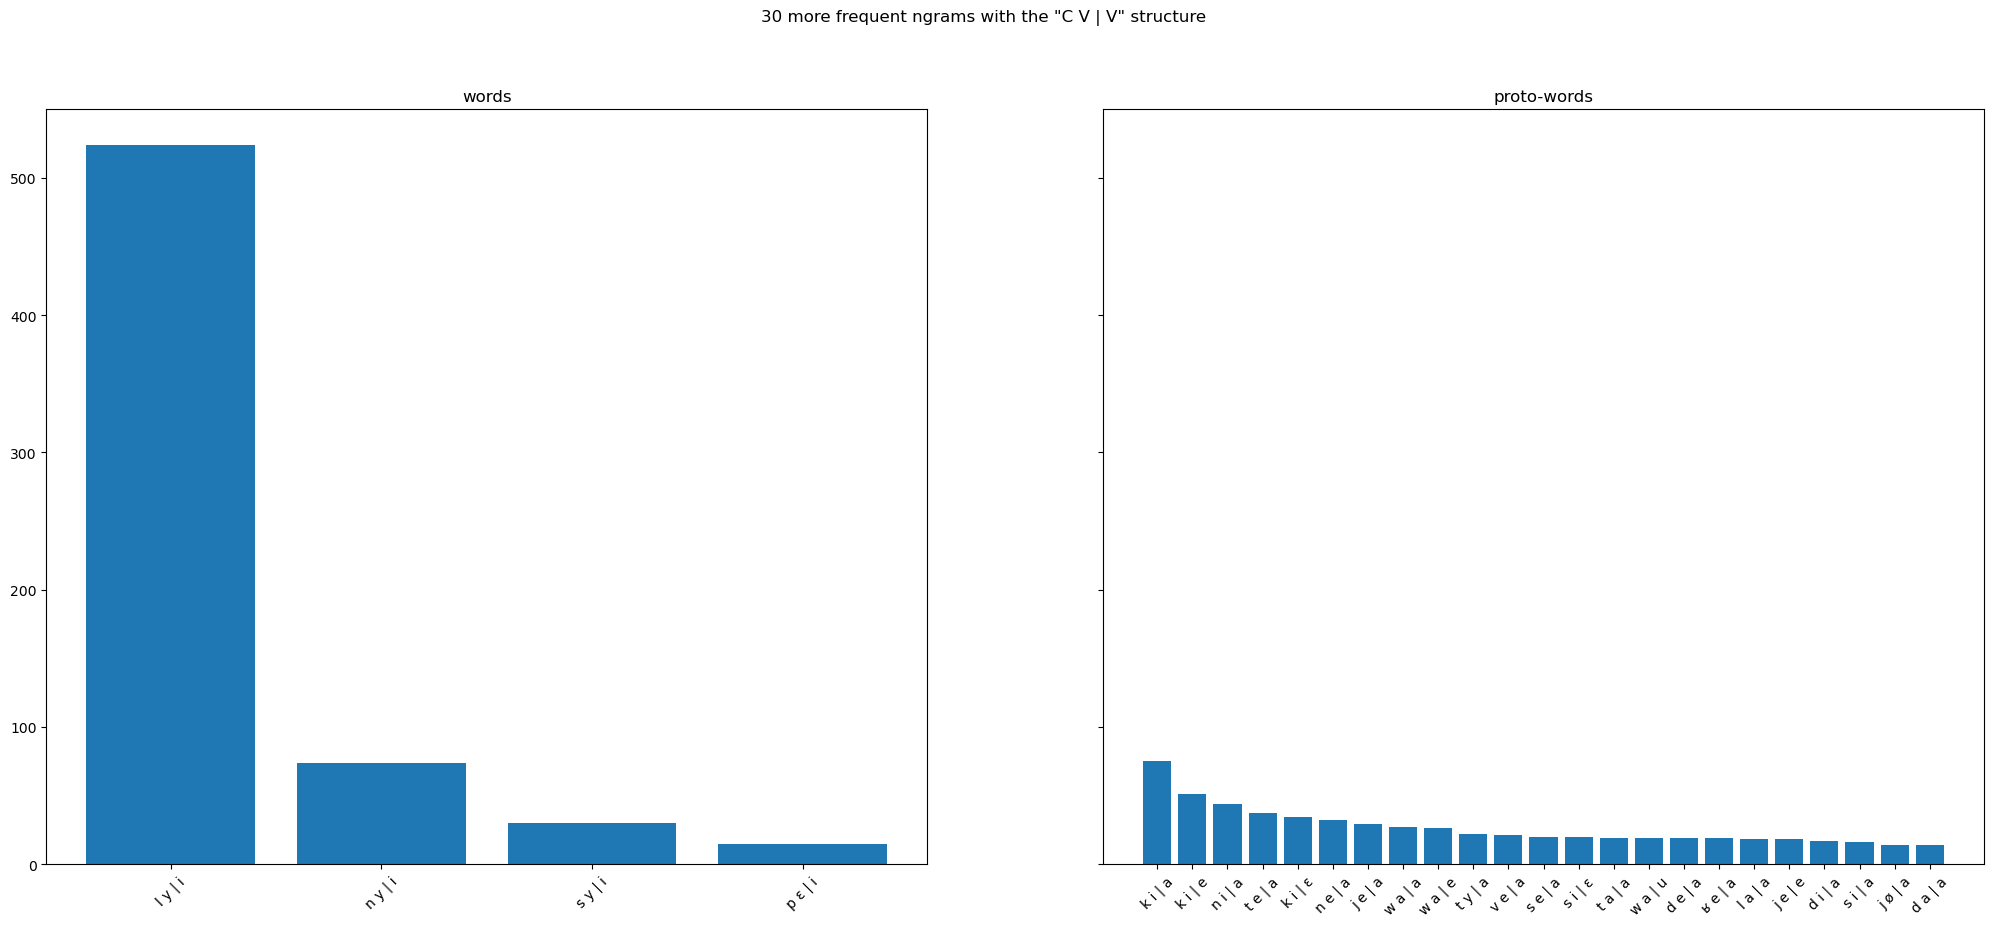

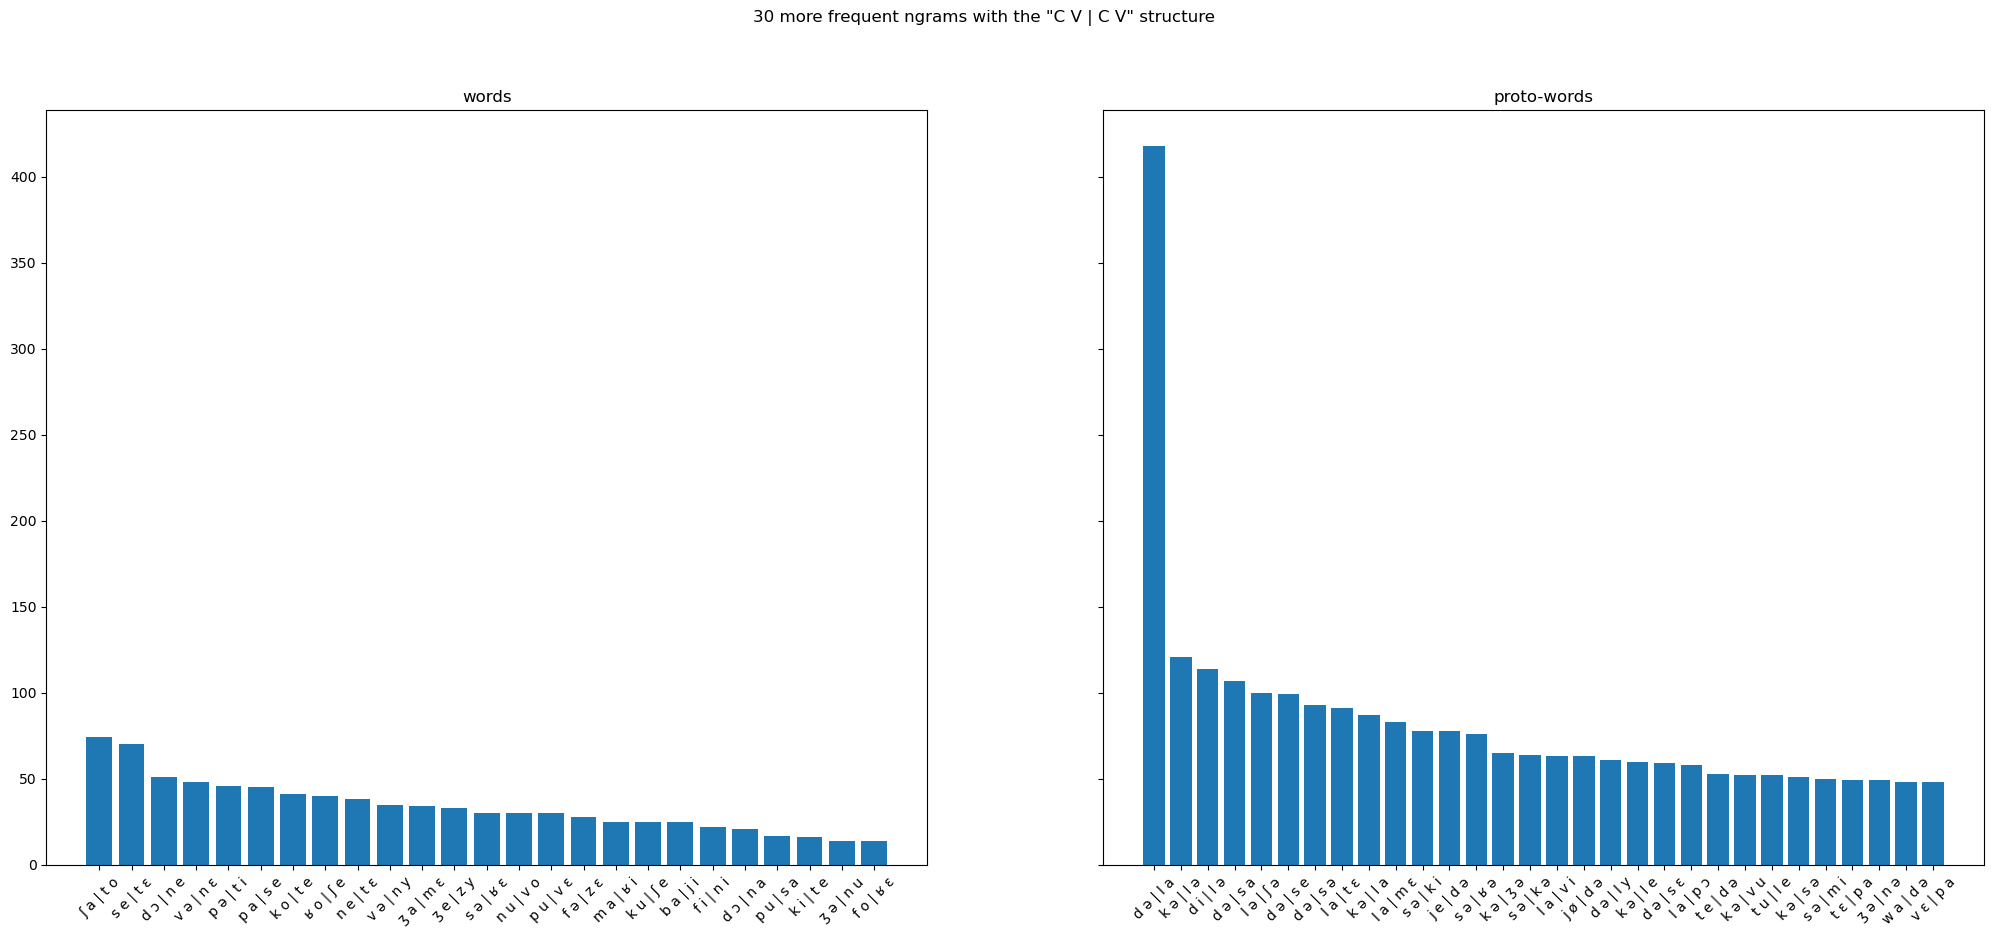

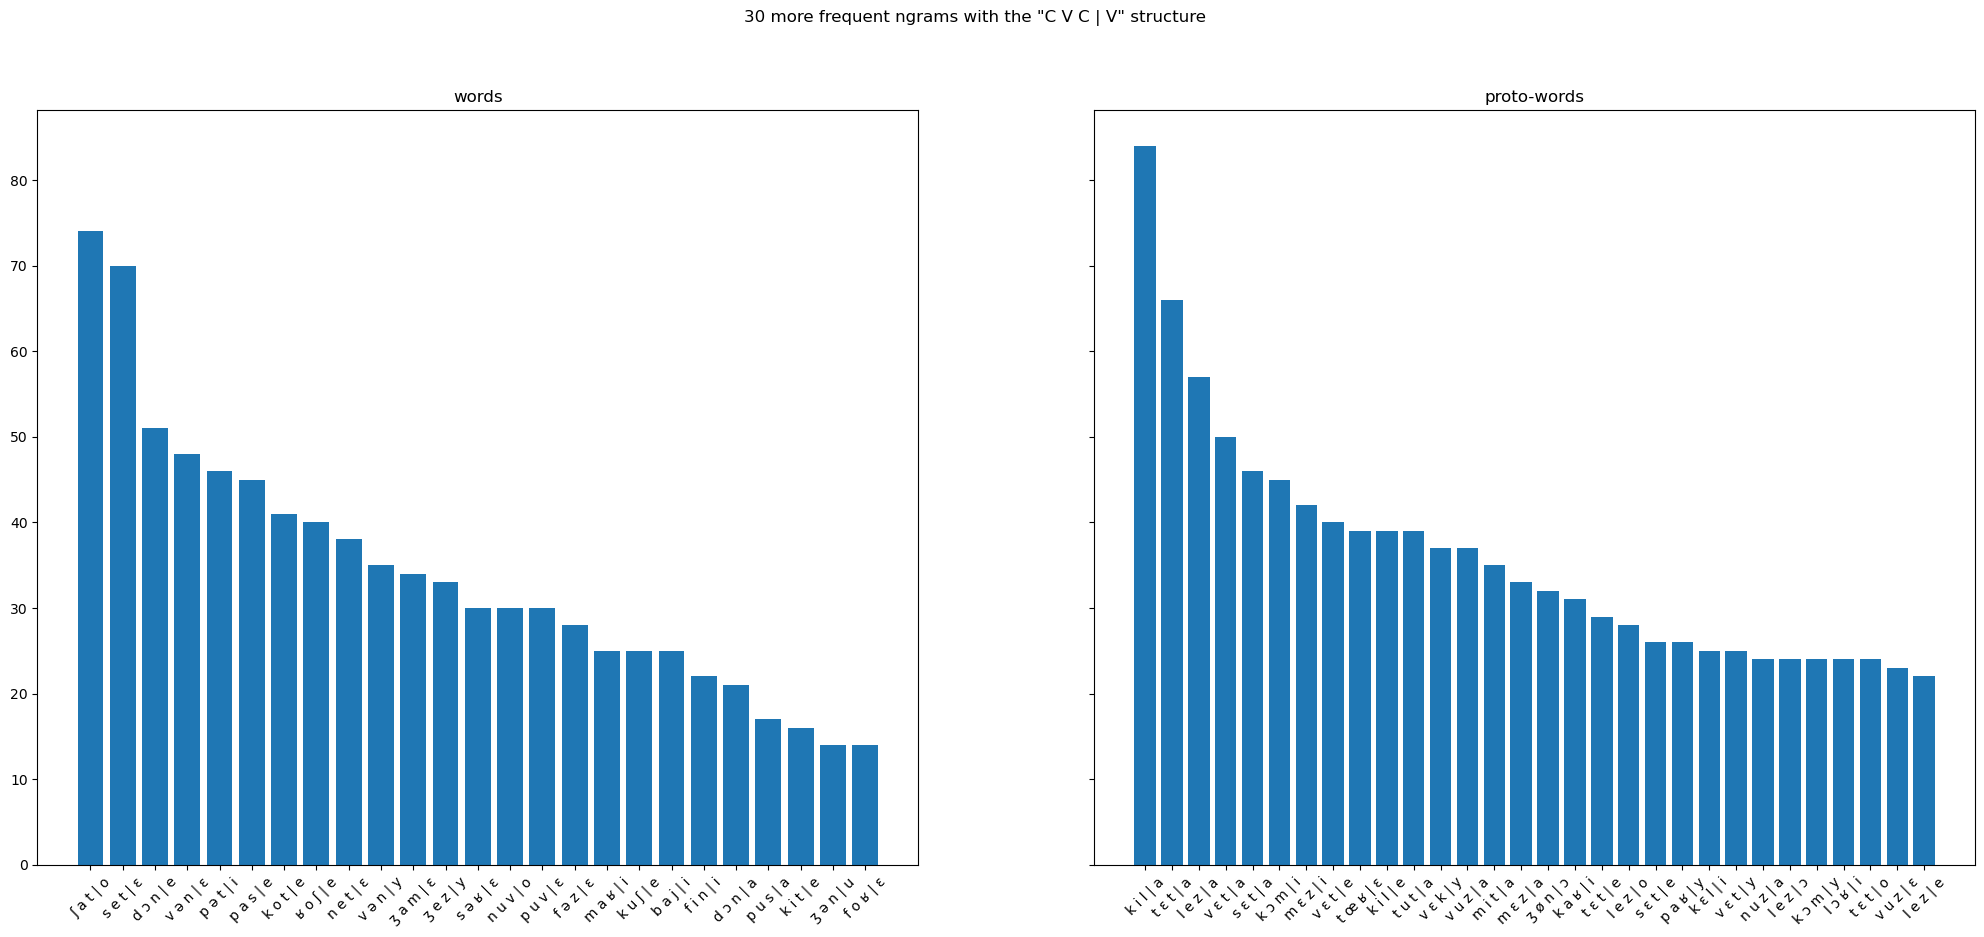

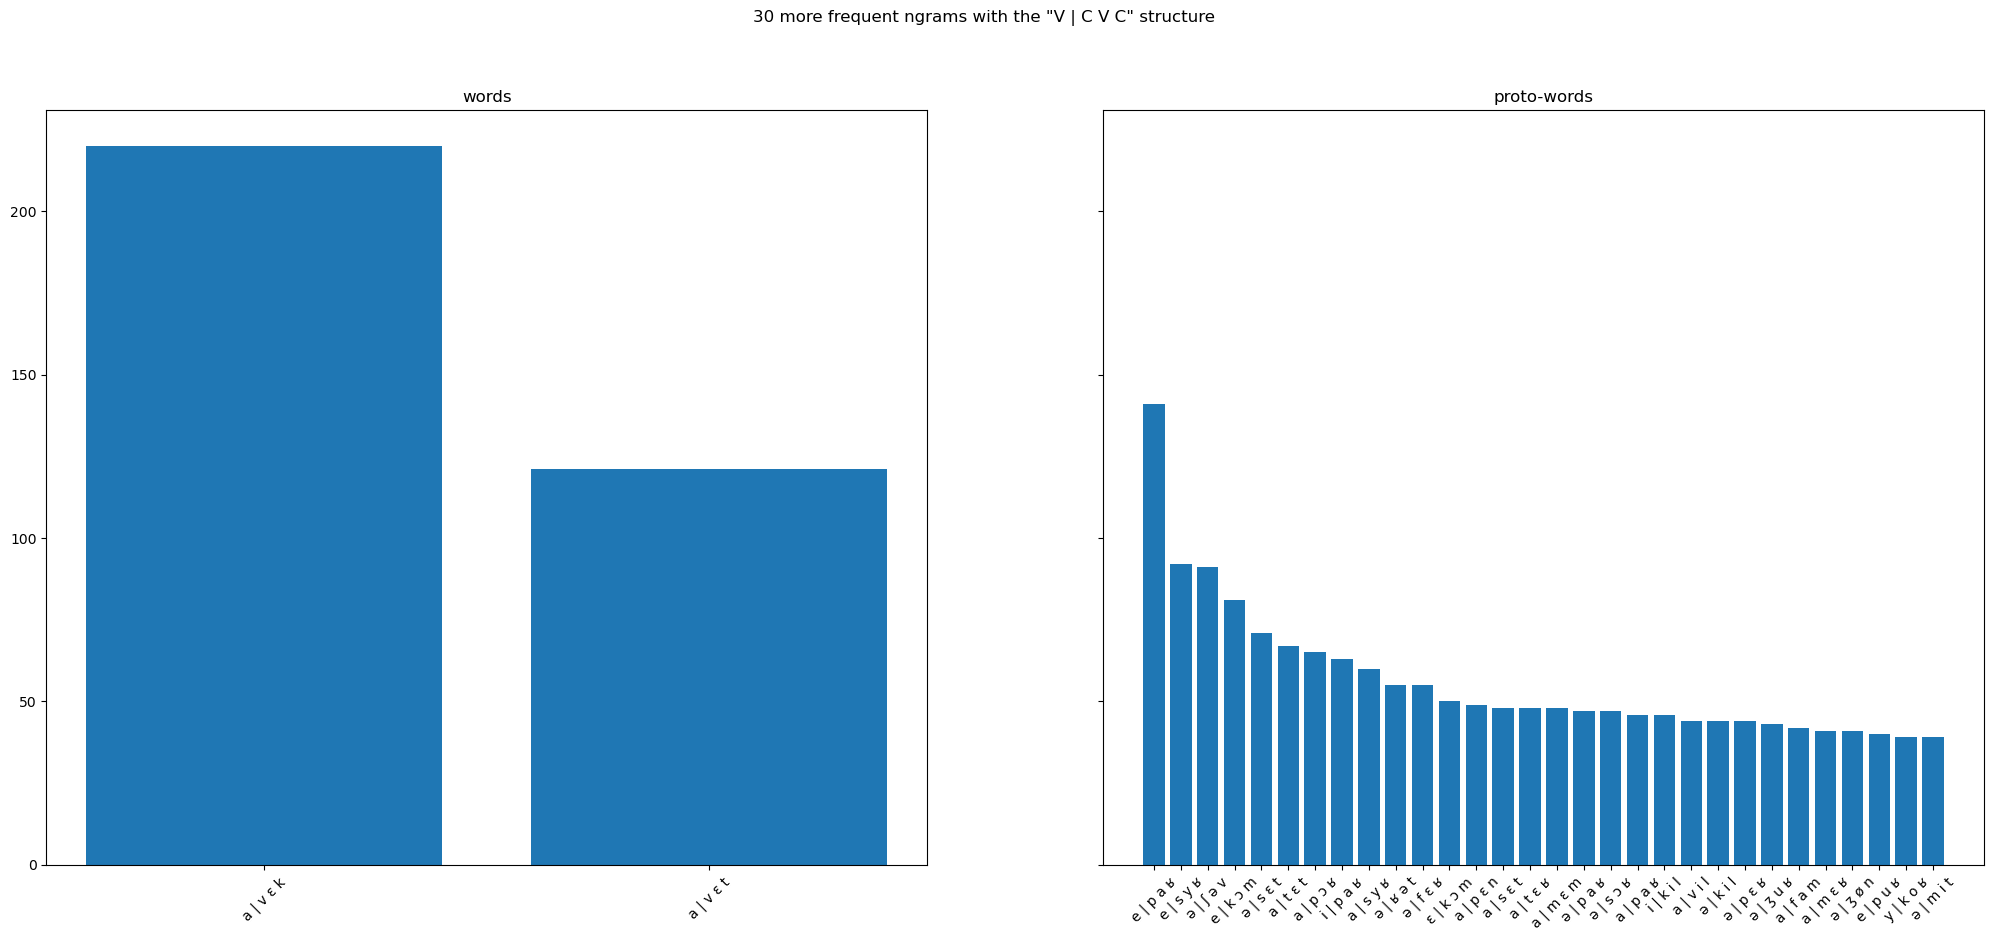

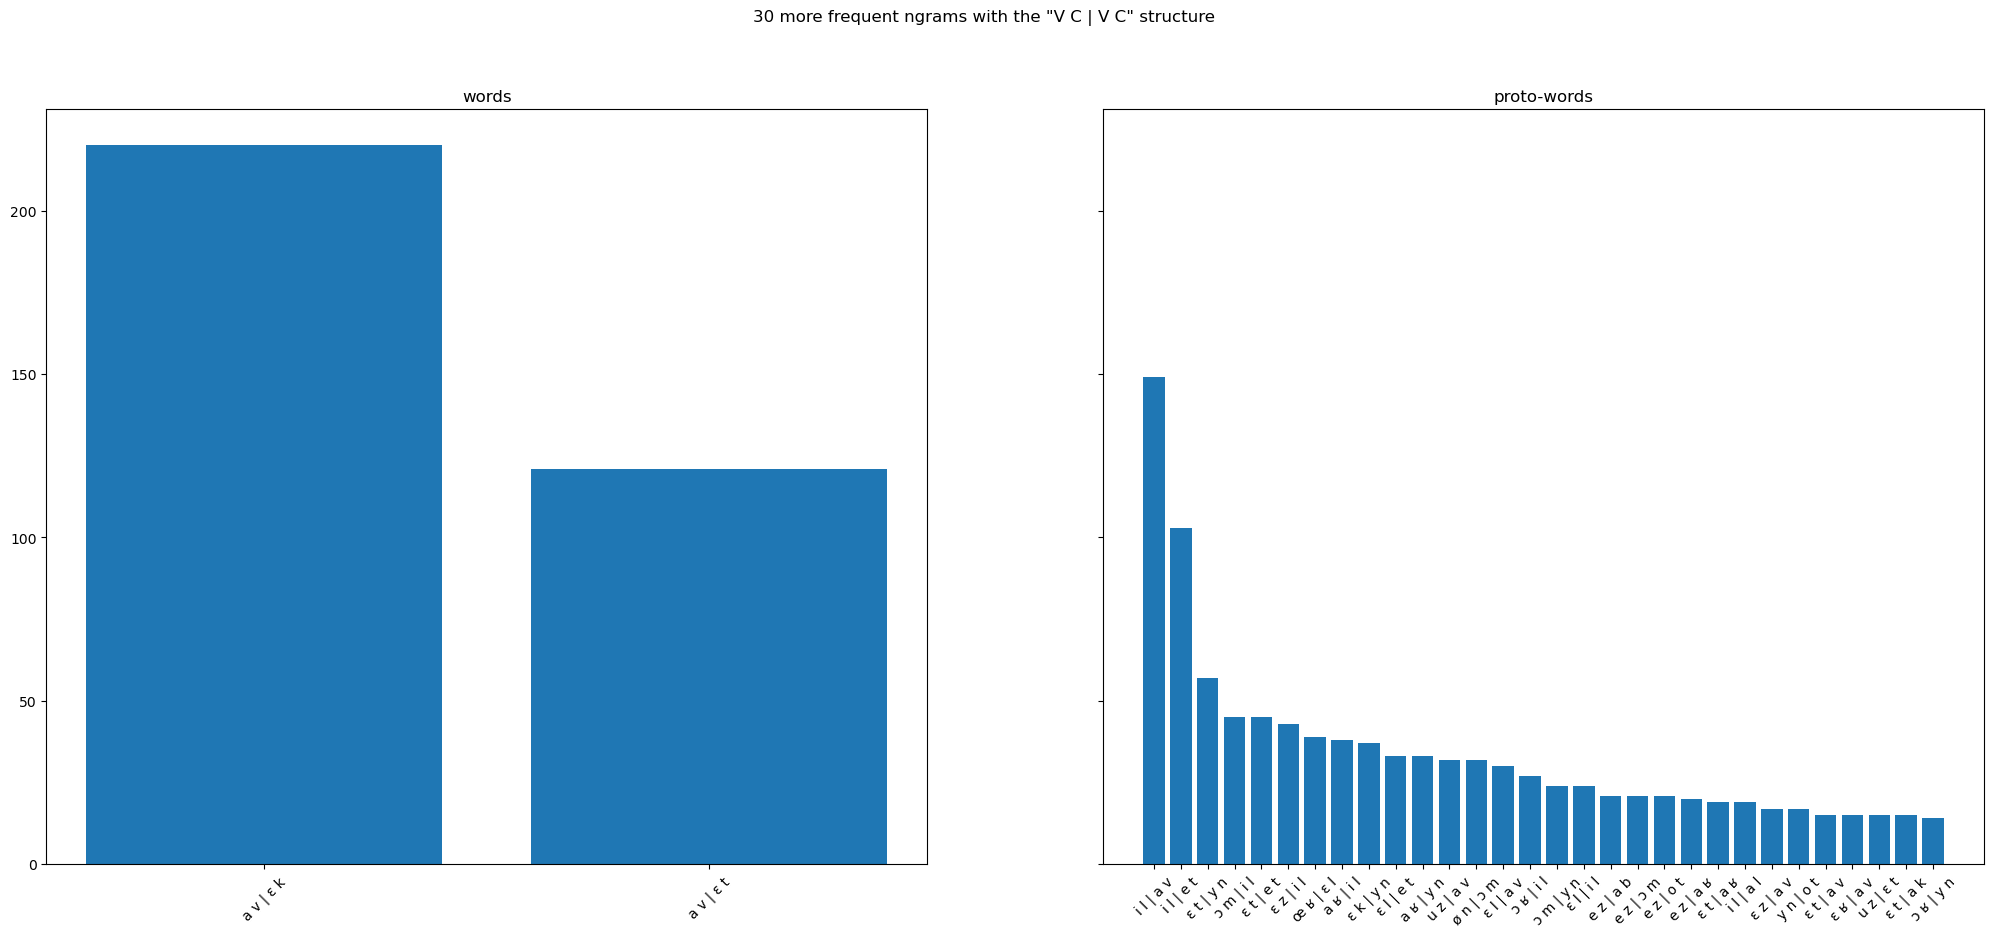

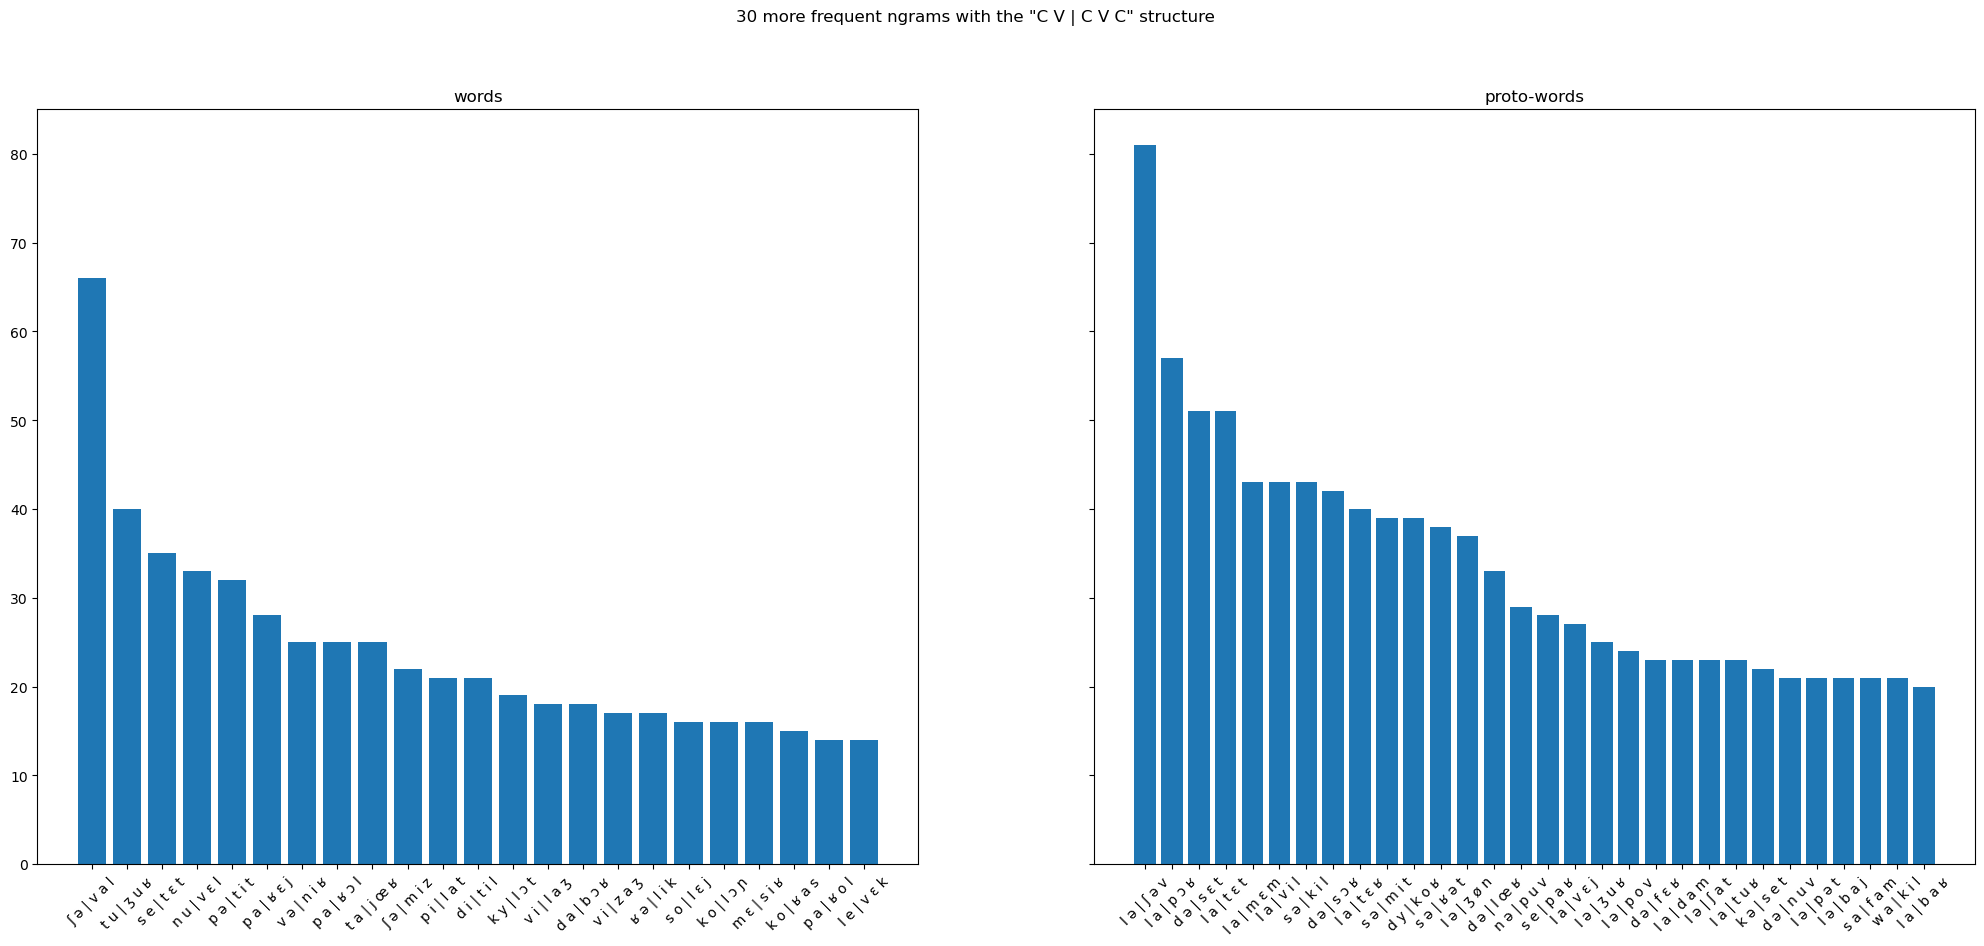

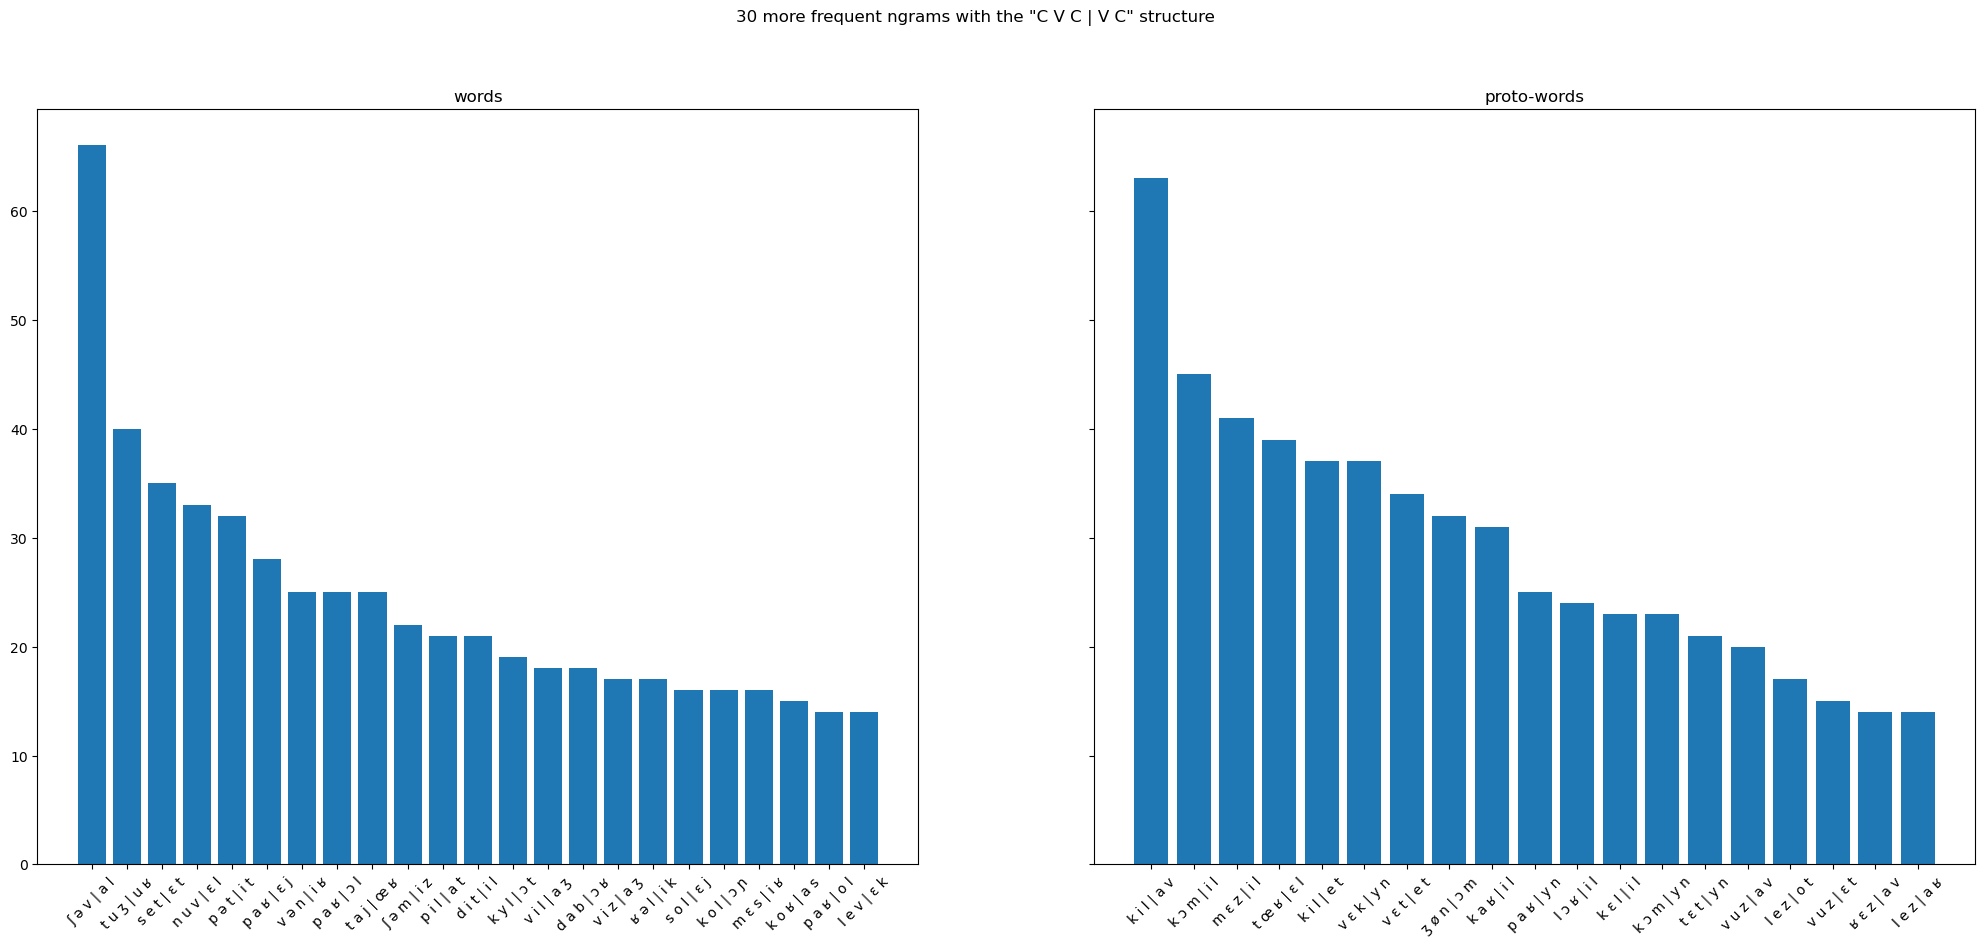

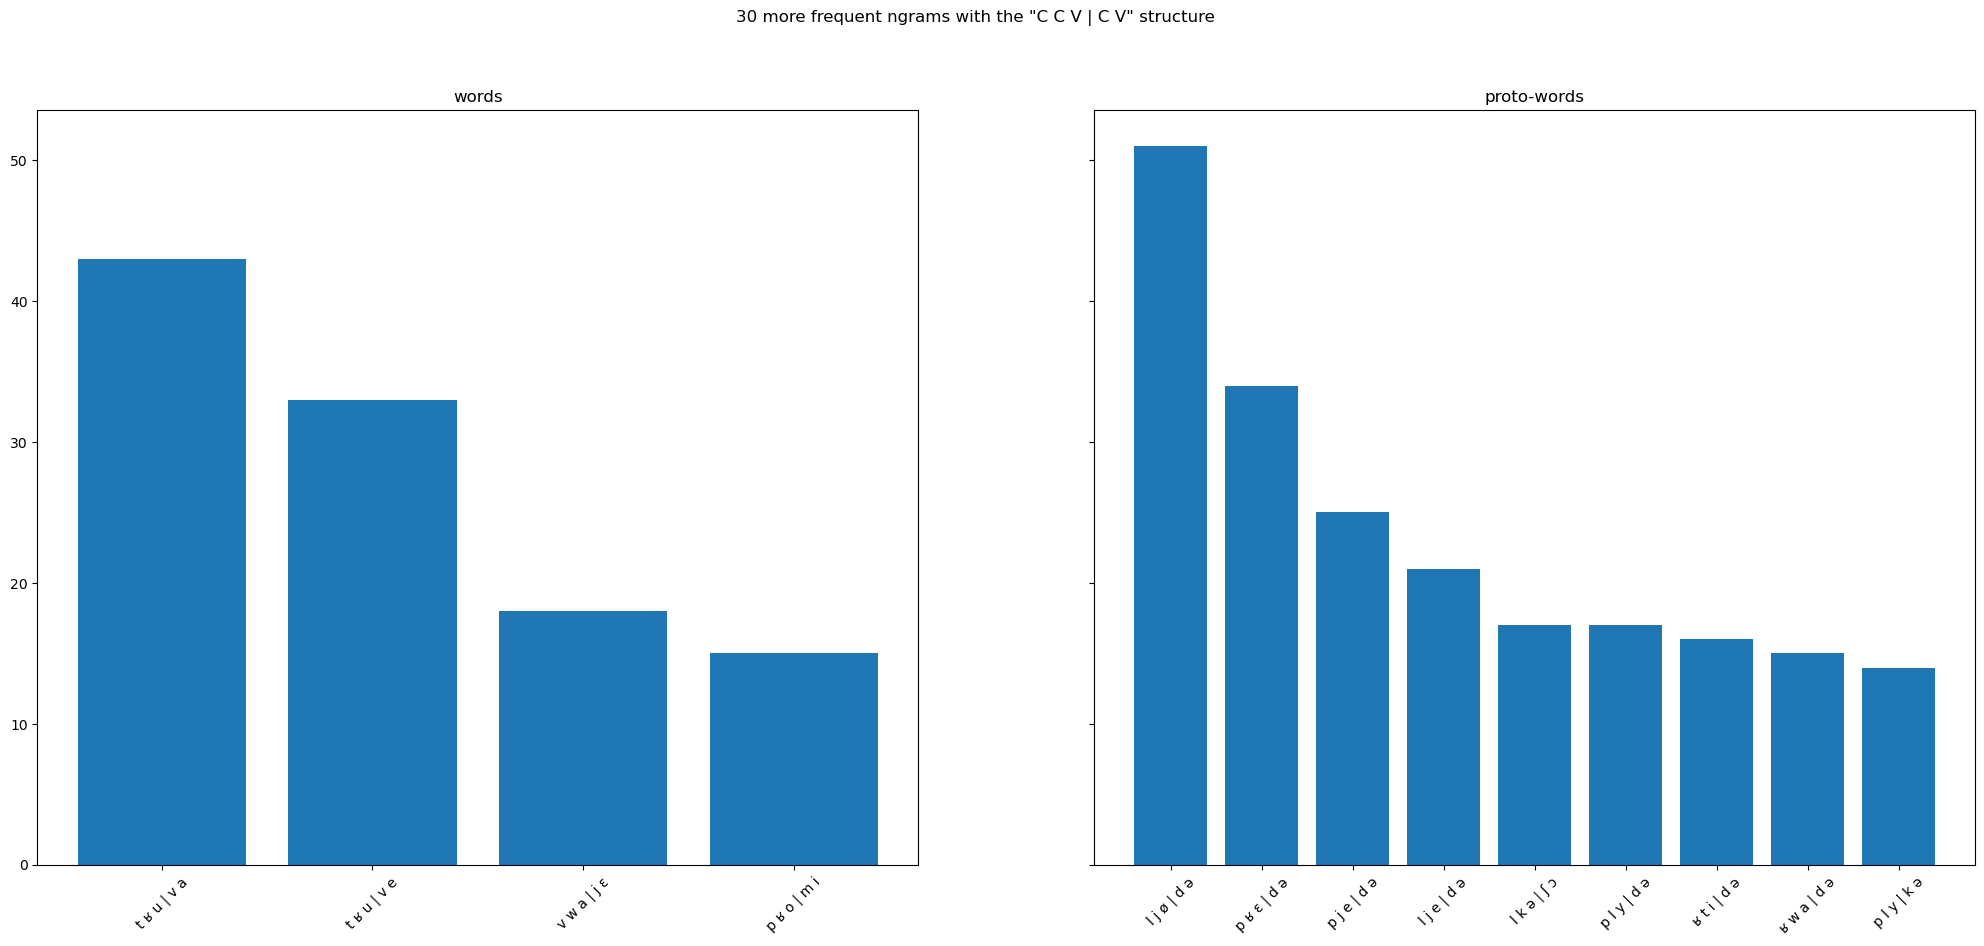

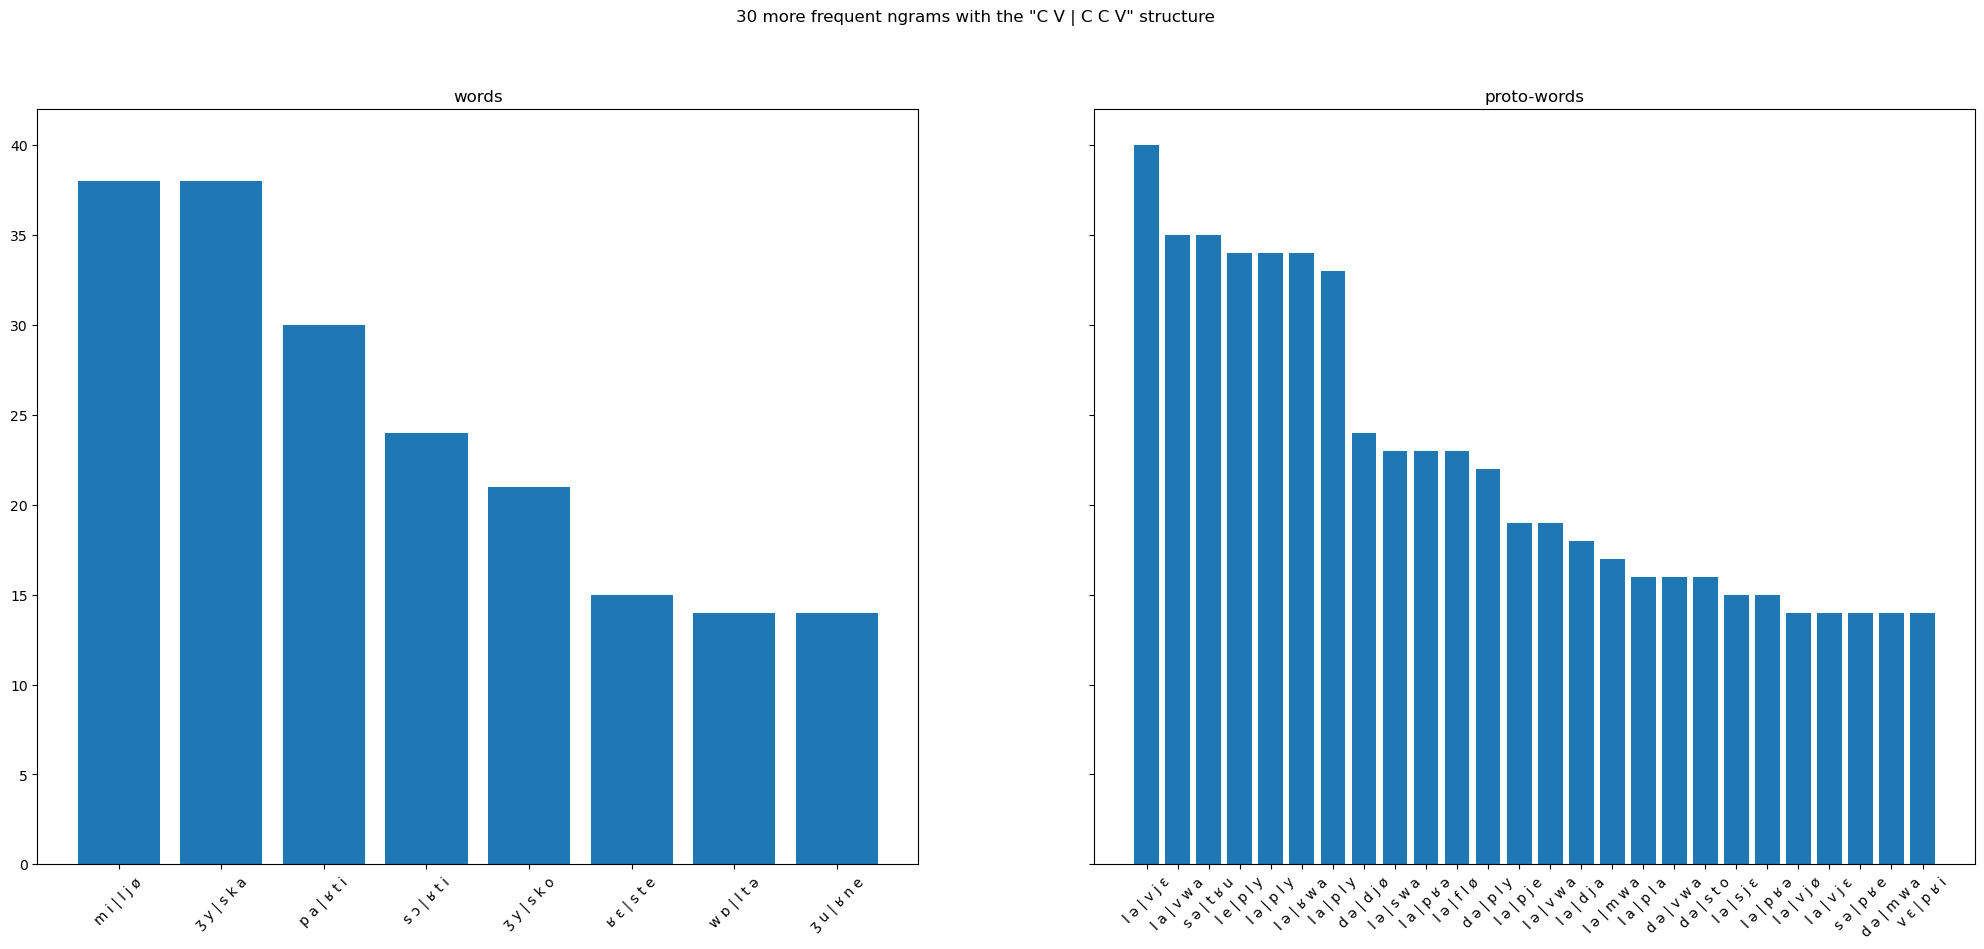

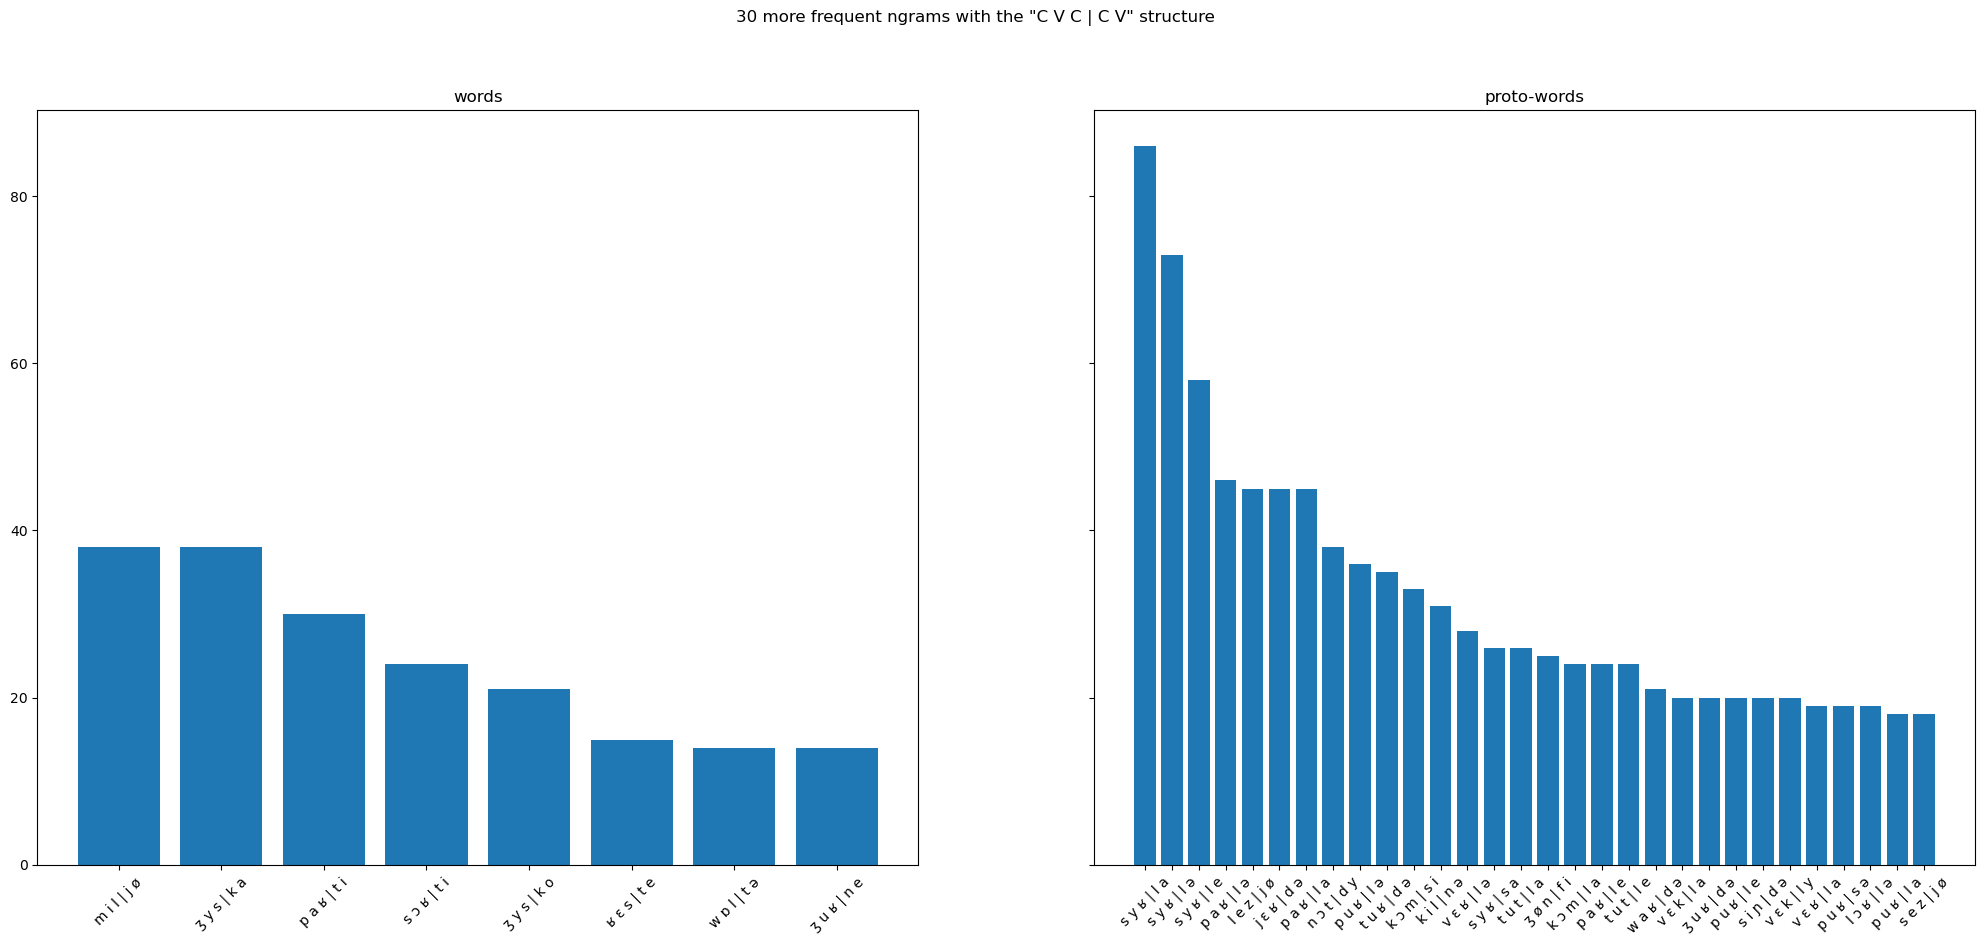

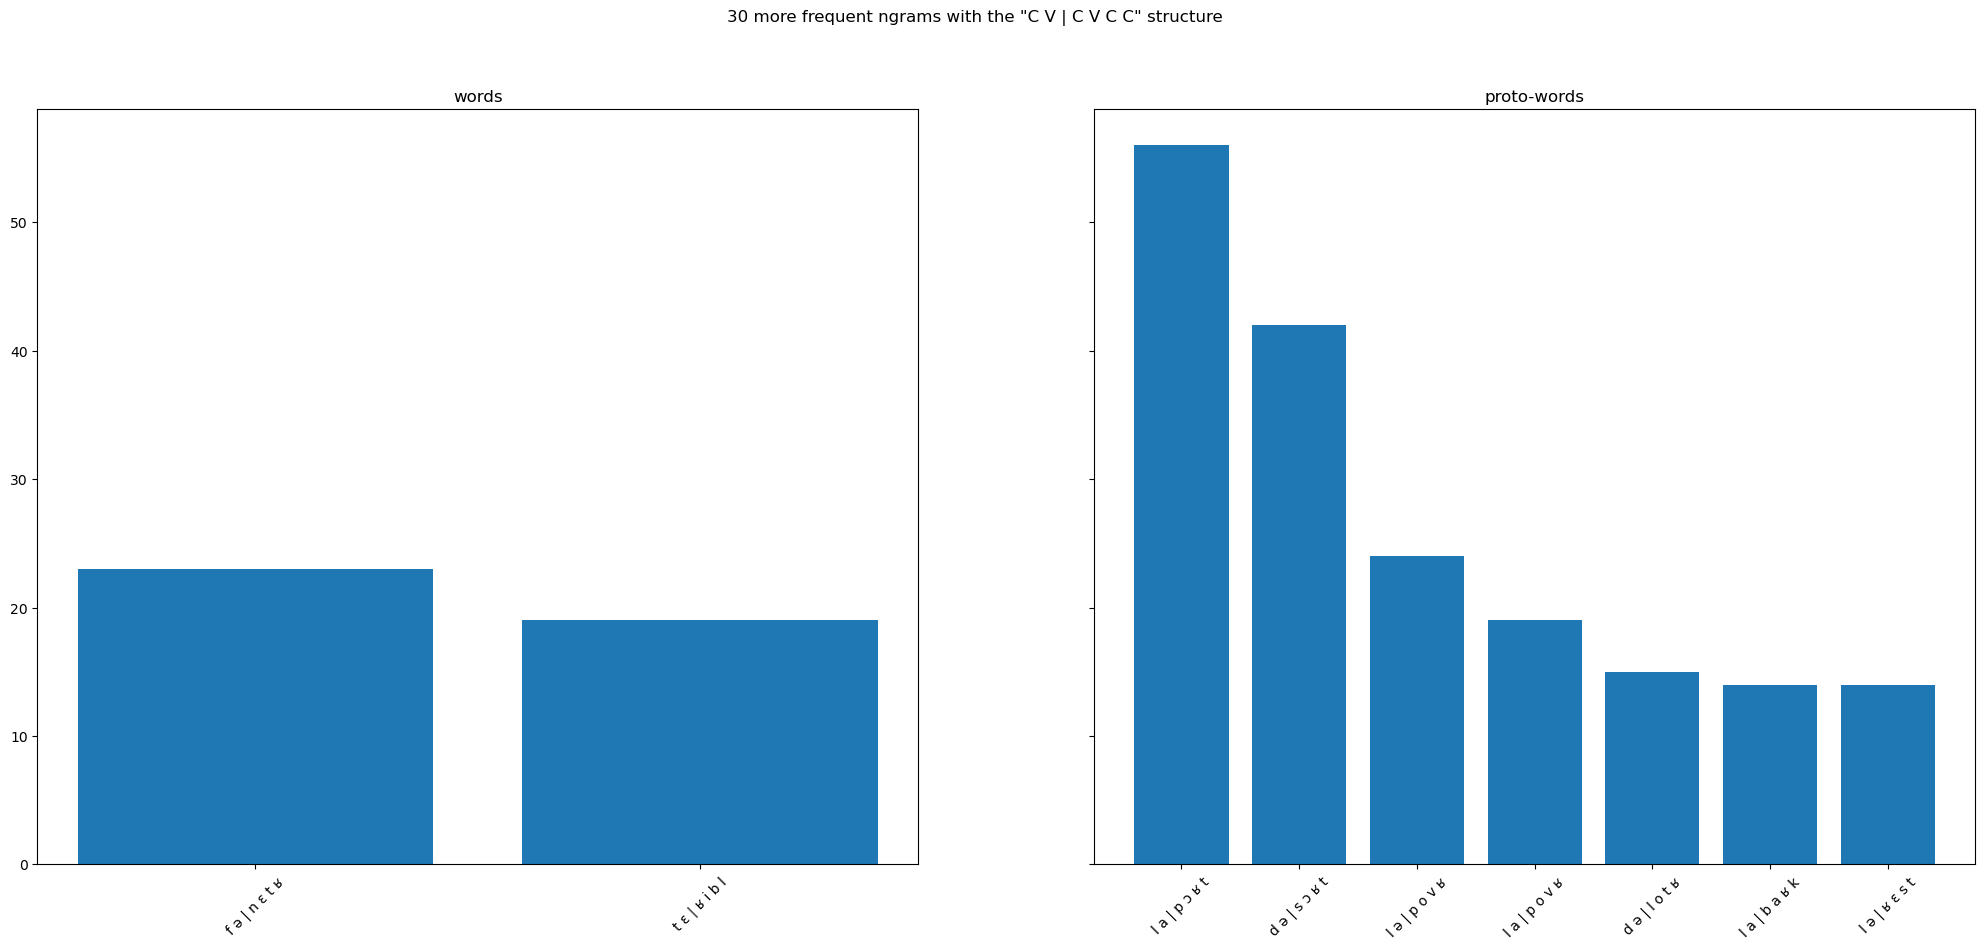

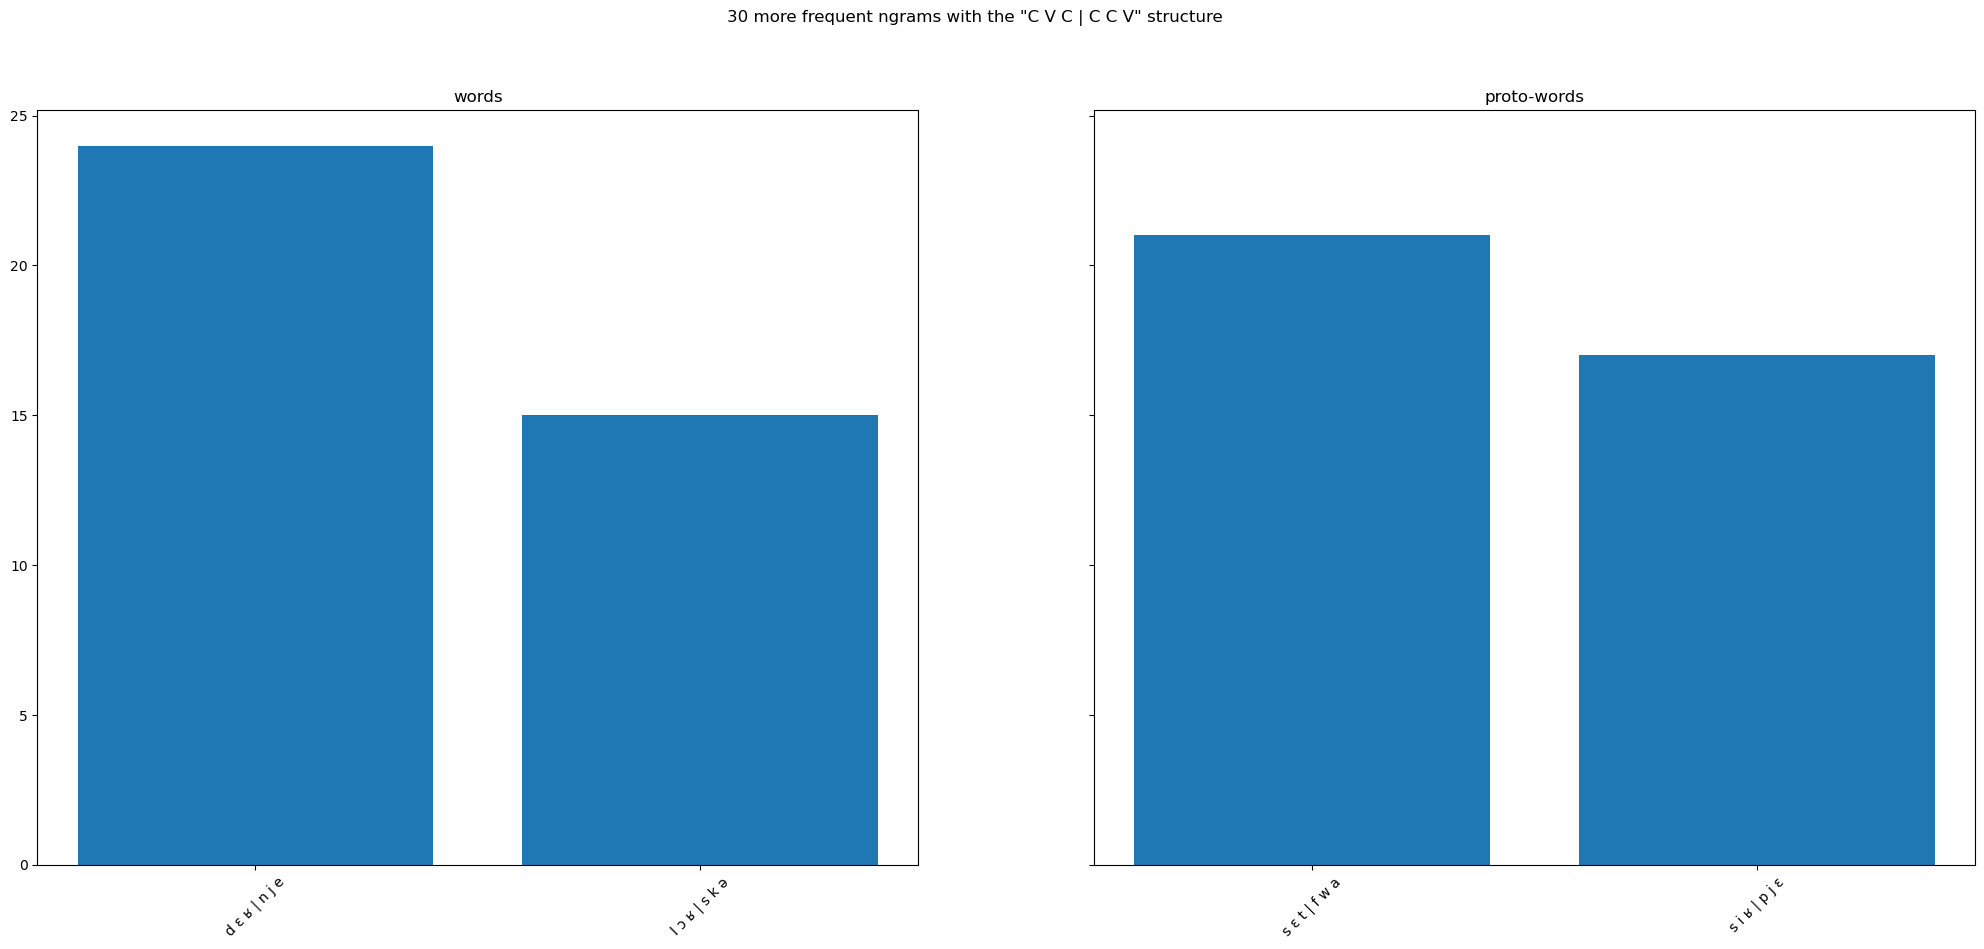

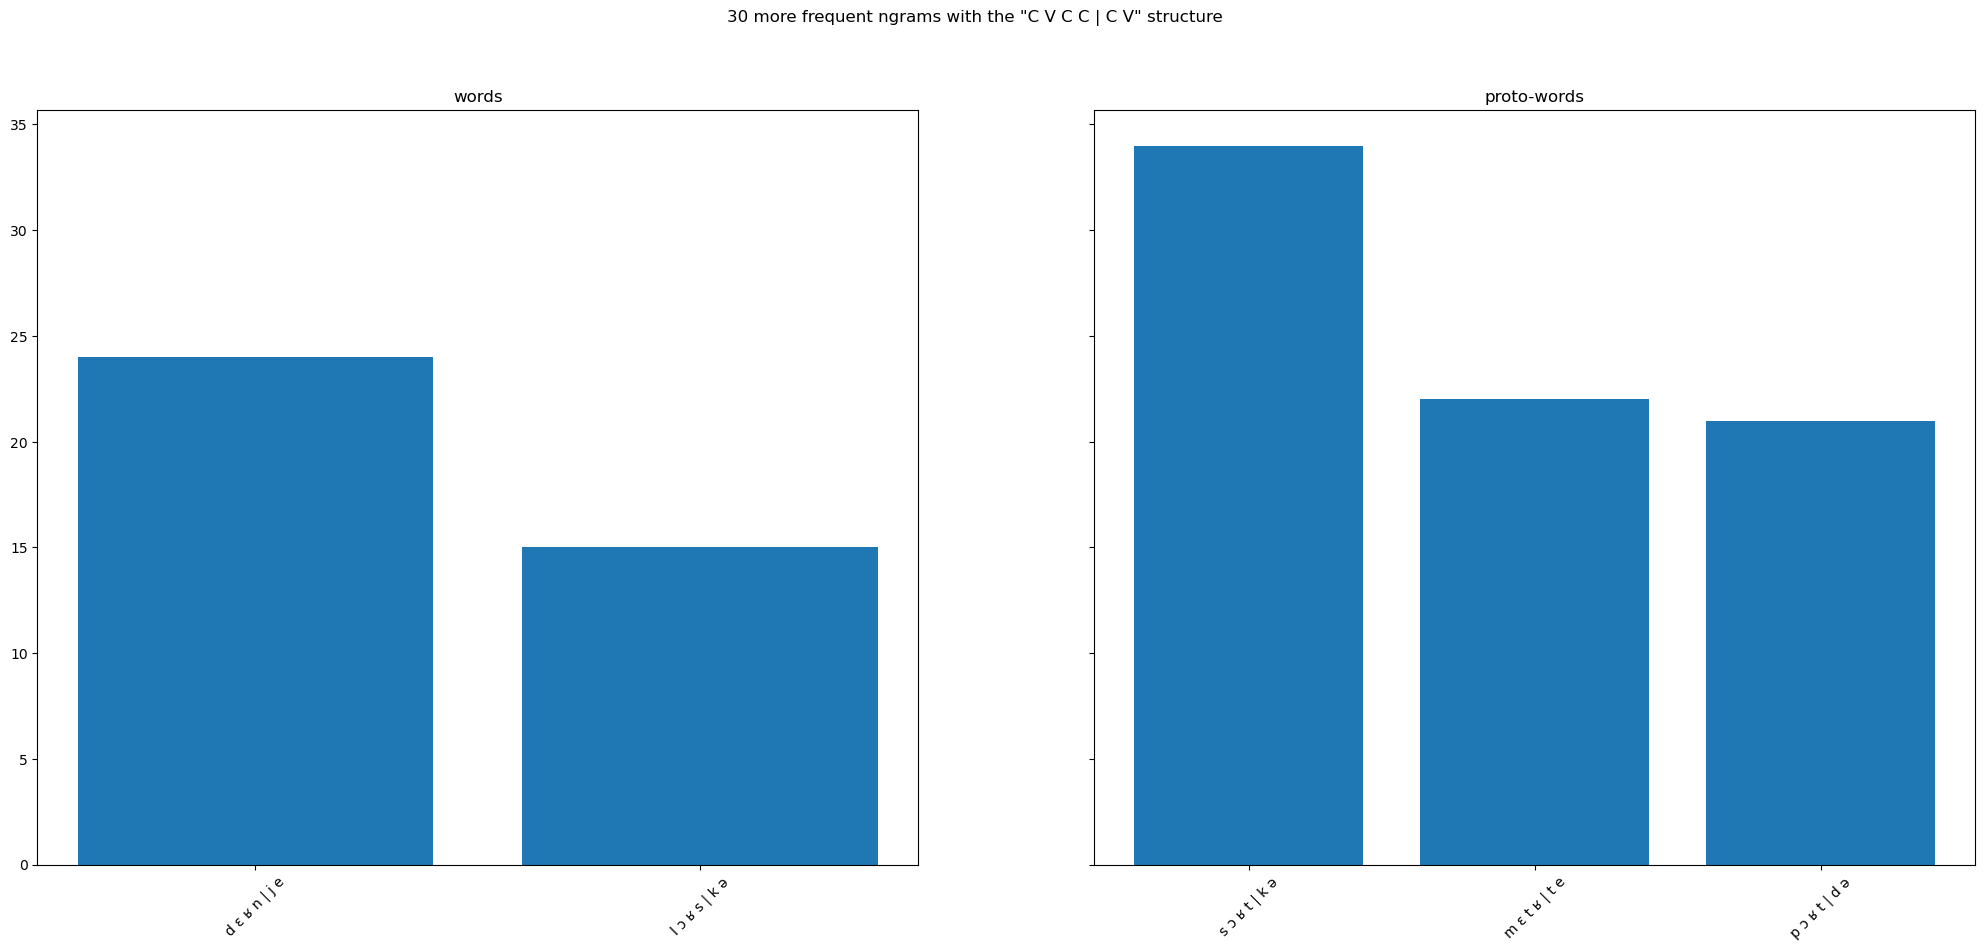

In [19]:
for struct in hf5.keys():
    plot_ngram(hf5, struct,n=30, p_type="bar")